<br>
<center> <h2>Maestría en Inteligencia Analítica para la Toma de Decisiones</h2> </center>
<center> <h3>Modelos avanzados para análisis de datos 1</h3> </center>
<br>
<h3>Exercise 12</h3>
<h3>Analyze how travelers expressed their feelings on Twitter</h3>
 

##### Presentado por:
    Lupe Pinzon Wagner                (200813063)
    Diego Andres Ojeda Vargas         (201924250)
    Héctor Fabián Rodríguez Mayorga   (201921382)
    Iván josé Galindo Gaviria         (201924193)

 

<h4> Julio 2020</h4>
<br>

# Exercise 12

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [10]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [11]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [12]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [13]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

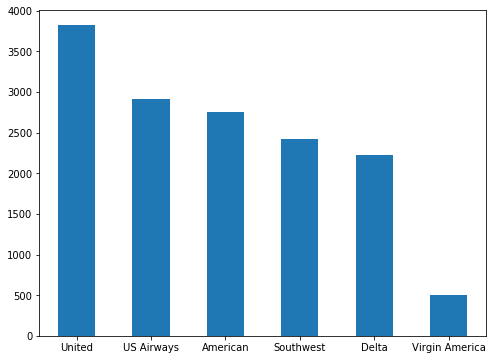

In [14]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

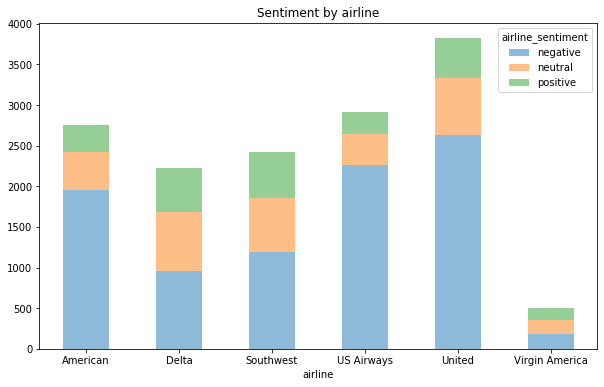

In [15]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 12.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [17]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [18]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [19]:
# use Random Forest Classifier to predict the star rating
rfc = RandomForestClassifier()
pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe()

count    10.000000
mean      0.732104
std       0.025305
min       0.700137
25%       0.711578
50%       0.730874
75%       0.742999
max       0.772541
dtype: float64

#### Con un Kfold CV de 10, tenemos un accuracy promedio para todas las clases de 73.2%

# Exercise 12.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [24]:
    vect = CountVectorizer(stop_words='english')
    X_dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe())

count    10.000000
mean      0.716462
std       0.043644
min       0.625000
25%       0.705943
50%       0.719945
75%       0.736680
max       0.786202
dtype: float64


#### Con un kfold CV de 10 y quitando las stopwords, tenemos un accuracy para todas las clases de 71.6%. Lo que quiere decir que el modelo predice mejor con stop words.

In [21]:
# remove English stop words
ACC = []
for i in range(1,11):
    vect = CountVectorizer(stop_words='english',max_features=10*i)
    X_dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    ACC.append(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).mean())
    #print(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe())


Text(0, 0.5, 'RMSE')

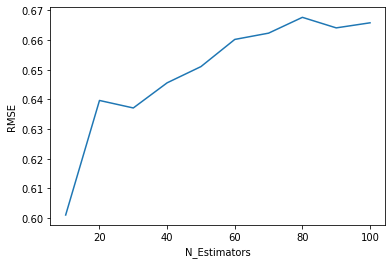

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(10,110,10), ACC)
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [25]:
    vect = CountVectorizer(stop_words='english',max_features= 100)
    X_dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe())

count    10.000000
mean      0.665369
std       0.052879
min       0.546448
25%       0.641735
50%       0.674522
75%       0.697234
max       0.723361
dtype: float64


###### Con un kfold CV de 10, las 100 tokens mas relevantes y quitando las stopwords, tenemos un accuracy para todas las clases de 66.5%

# Exercise 12.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [38]:
    vect = CountVectorizer(ngram_range=(1,4),max_features=100)
    X_dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe())

count    10.000000
mean      0.688525
std       0.044816
min       0.577869
25%       0.680157
50%       0.704918
75%       0.712261
max       0.734290
dtype: float64


###### Con un kfold CV de 10, las 100 tokens mas relevantes, con las stopwords y n_gramas de 1 a 4, tenemos un accuracy para todas las clases de 68.8%

In [39]:
    vect = CountVectorizer(stop_words='english',ngram_range=(1,4),max_features=100)
    X_dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, X_dtm, y, cv=10)).describe())

count    10.000000
mean      0.663525
std       0.053368
min       0.547814
25%       0.638149
50%       0.673156
75%       0.692794
max       0.728142
dtype: float64


###### Con un kfold CV de 10, las 100 tokens mas relevantes, quitando las stopwords y n_gramas de 1 a 4, tenemos un accuracy para todas las clases de 66.3%

# Exercise 12.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [45]:
    vect = TfidfVectorizer(max_features=100)
    dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, dtm, y, cv=10)).describe())

count    10.000000
mean      0.692281
std       0.033692
min       0.614071
25%       0.685109
50%       0.694672
75%       0.709529
max       0.741120
dtype: float64


###### Usando TfidfVectorizer, con un kfold CV de 10, las 100 tokens mas relevantes, con stopwords, tenemos un accuracy para todas las clases de 69.2%

In [46]:
    vect = TfidfVectorizer(stop_words='english',max_features=100)
    dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, dtm, y, cv=10)).describe())

count    10.000000
mean      0.675342
std       0.047309
min       0.575137
25%       0.657958
50%       0.684768
75%       0.703210
max       0.732240
dtype: float64


###### Usando TfidfVectorizer, con un kfold CV de 10, las 100 tokens mas relevantes, sin stopwords, tenemos un accuracy para todas las clases de 67.5%

In [47]:
    vect = TfidfVectorizer(ngram_range=(1,4),max_features=100)
    dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, dtm, y, cv=10)).describe())

count    10.000000
mean      0.690096
std       0.043559
min       0.592213
25%       0.672643
50%       0.699795
75%       0.713456
max       0.752049
dtype: float64


###### Usando TfidfVectorizer, con un kfold CV de 10, las 100 tokens mas relevantes, con stopwords y n gramas de 1 a 4, tenemos un accuracy para todas las clases de 69%

In [48]:
    vect = TfidfVectorizer(stop_words='english',ngram_range=(1,4),max_features=100)
    dtm = vect.fit_transform(X)
    rfc = RandomForestClassifier()
    print(pd.Series(cross_val_score(rfc, dtm, y, cv=10)).describe())

count    10.000000
mean      0.671380
std       0.049448
min       0.568306
25%       0.656250
50%       0.679303
75%       0.699966
max       0.727459
dtype: float64


###### Usando TfidfVectorizer, con un kfold CV de 10, las 100 tokens mas relevantes, sin stopwords y n gramas de 1 a 4, tenemos un accuracy para todas las clases de 67.1%

# Conclusiones

- El mejor acurracy se obtuvo usando CountVectorizer y con todos los parametros por default.
- En general quitando los stopwords(estandar), todos los modelos dieron un accuracy mas bajo. 
- Usando n_gramas en el CountVectorizer los modelos tienen mejor accuracy.
- Con el uso de TF-IDF se obtuvieron mayores acurracy que con CountVectorizer. 